In [1]:
import pandas as pd

## 1. Load Dataset (train, test)

In [2]:
#훈련 데이터 가져오기
train = pd.read_csv('data/train.csv',index_col='PassengerId')
print(train.shape)
print(train.info())
train.head(2)

(891, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
#테스트 데이터 가져오기
test = pd.read_csv('data/test.csv',index_col='PassengerId')
print(test.shape)
print(test.info())
test.head(2)

(418, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB
None


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


## 2. Data PreProcessing

In [4]:
# 성별(sex) 값이 male이면 열의 값을 0으로 , female이면 열의 값을 1로 set 
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Series 객체
print(type(train.loc[train['Sex'] == 'male','Sex']))
train.loc[train['Sex'] == 'male','Sex'] = 0
train.loc[train['Sex'] == 'female','Sex'] = 1

<class 'pandas.core.series.Series'>


In [6]:
test.loc[test['Sex'] == 'male','Sex'] = 0
test.loc[test['Sex'] == 'female','Sex'] = 1

In [8]:
#DataFrame
#print(type(train.loc[train['Sex'] == 'male',['Sex','Name']]))
#train.loc[train['Sex'] == 'male',['Sex','Name']]
train.head()
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
#Embarked 컬럼 unique 값 
train['Embarked'].unique()
#C == 0, S == 1, Q == 2
#S + S = Q, 2 * S = Q (x)

#One Hot Encoding
#C=[True,False,False]
#S=[False,True,False]
#Q=[False,Fals,True]
#Embarked_C 컬럼을 추가하고 Embarked 값이 "C"이면 True추가 아니면 False를 추가한다.
train['Embarked_C'] = train['Embarked'] == "C"
train['Embarked_S'] = train['Embarked'] == "S"
train['Embarked_Q'] = train['Embarked'] == "Q"
train.loc[:,['Embarked','Embarked_C','Embarked_S','Embarked_Q']].head(10)

,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False
6,Q,False,False,True
7,S,False,True,False
8,S,False,True,False
9,S,False,True,False


In [12]:
test['Embarked_C'] = test['Embarked'] == "C"
test['Embarked_S'] = test['Embarked'] == "S"
test['Embarked_Q'] = test['Embarked'] == "Q"
test.loc[:,['Embarked','Embarked_C','Embarked_S','Embarked_Q']].head(10)

,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False
897,S,False,True,False
898,Q,False,False,True
899,S,False,True,False
900,C,True,False,False


In [14]:
#요금(Fare) 값이 null인 경우에 값을 0으로 변경
test.loc[test['Fare'].isnull(),'Fare'] = 0
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,


## 3. train & predict

In [16]:
#필요한 컬럼을 선택
feature_names = ['Sex','Fare','Pclass','Embarked_C','Embarked_S','Embarked_Q']
feature_names

['Sex', 'Fare', 'Pclass', 'Embarked_C', 'Embarked_S', 'Embarked_Q']

In [17]:
#train Dataframe에서 feature_names의 컬럼을 가져와서 X_train DataFrame 저장
#훈련데이터 생성
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(891, 6)


,Sex,Fare,Pclass,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
1,0,7.2500,3,False,True,False
2,1,71.2833,1,True,False,False
3,1,7.9250,3,False,True,False
4,1,53.1000,1,False,True,False
5,0,8.0500,3,False,True,False


In [18]:
#테스트 데이터 생성
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(418, 6)


,Sex,Fare,Pclass,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
892,0,7.8292,3,False,False,True
893,1,7.0000,3,False,True,False
894,0,9.6875,2,False,False,True
895,0,8.6625,3,False,True,False
896,1,12.2875,3,False,True,False


In [19]:
#훈련데이터의 레이블(답) 생성
#train DataFrame에서 Survived 컬럼을 가져와서 y_train에 저장
label_name='Survived'
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [20]:
# DecisionTreeClassifier 알고리즘 선택
from sklearn.tree import DecisionTreeClassifier

#의사 결정트리의 최대깊이를 5로 설정
model = DecisionTreeClassifier(max_depth=5,random_state=0)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [22]:
#학습하기
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [23]:
#예측하기
predictions = model.predict(X_test)
print(predictions.shape)
predictions

(418,)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## 3.1 Visualize

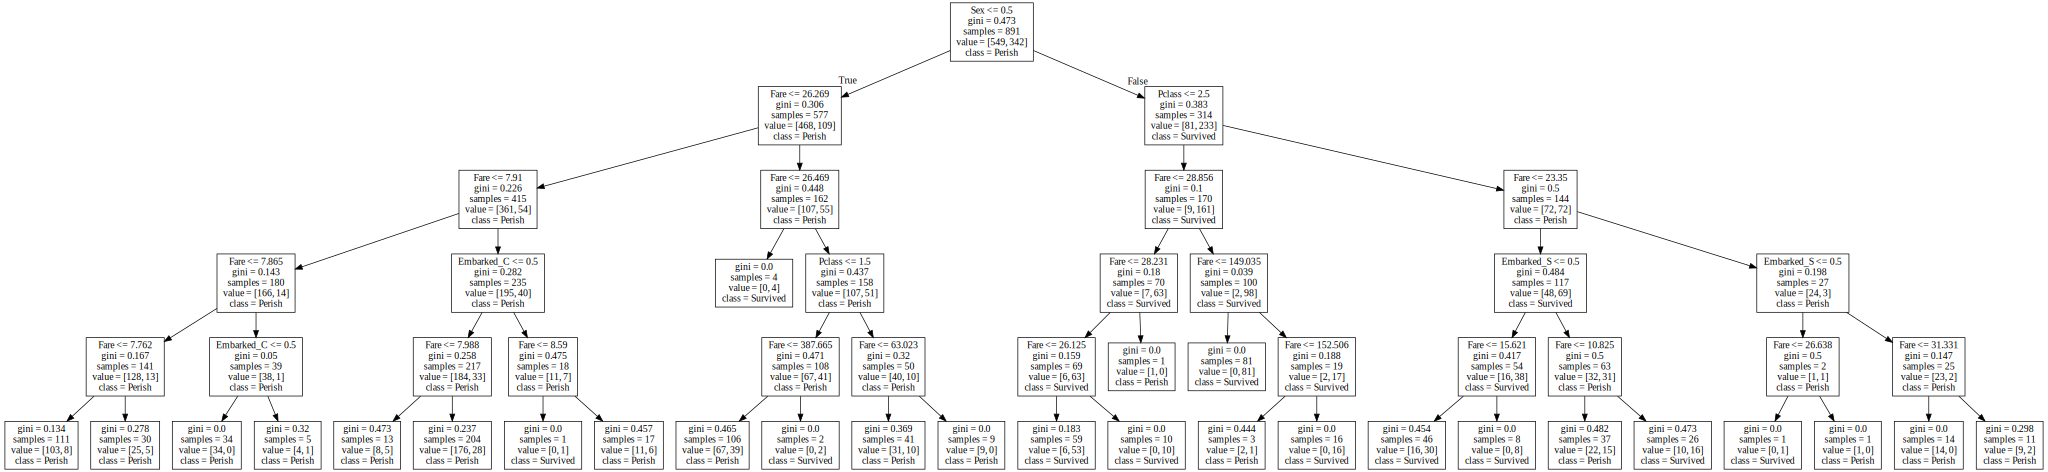

In [29]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,feature_names=feature_names,class_names=["Perish","Survived"],\
               out_file="decision-tree.dot")
with open("decision-tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)    

## 4. Submission

In [24]:
# 제출하기 위해 제공된 gender_submission.csv 데이터를 load
submit = pd.read_csv('data/gender_submission.csv',index_col='PassengerId')
print(submit.shape)
submit.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [25]:
#submit dataframe의 Survived 컬럼을 predictions(예측한값)으로 변경
submit['Survived'] = predictions
print(submit.shape)
submit.head()

(418, 1)


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [26]:
#submit dataframe을 csv 파일로 저장해서 kaggle에 제출
submit.to_csv('data/result01.csv')